In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
index_list = glob.glob('./crawling_data/x_data/index/*.csv')
exchage_list = glob.glob('./crawling_data/x_data/exchange/*.csv')
fuel_list = glob.glob('./crawling_data/x_data/fuel/*.csv')

In [6]:
index_dutch = pd.read_csv(index_list[0],index_col=0)
index_euro = pd.read_csv(index_list[1],index_col=0)
index_london = pd.read_csv(index_list[2],index_col=0)
index_nasdaq = pd.read_csv(index_list[3],index_col=0)
index_paris = pd.read_csv(index_list[4],index_col=0)
index_shanghai = pd.read_csv(index_list[5],index_col=0)

In [7]:
exchange_cny = pd.read_csv(exchage_list[0],index_col=0)
exchange_eur = pd.read_csv(exchage_list[1],index_col=0)
exchange_gbp = pd.read_csv(exchage_list[2],index_col=0)
exchange_usd = pd.read_csv(exchage_list[3],index_col=0)

In [8]:
fuel_dubai = pd.read_csv(fuel_list[0],index_col=0)
fuel_brent = pd.read_csv(fuel_list[1],index_col=0)
fuel_texas = pd.read_csv(fuel_list[2],index_col=0)

In [9]:
index_dutch.drop(['start','high','low'], axis=1, inplace=True)
index_euro.drop(['start','high','low'], axis=1, inplace=True)
index_london.drop(['start','high','low'], axis=1, inplace=True)
index_nasdaq.drop(['start','high','low'], axis=1, inplace=True)
index_paris.drop(['start','high','low'], axis=1, inplace=True)
index_shanghai.drop(['start','high','low'], axis=1, inplace=True)
index_dutch.columns = ['date','dutch_close']
index_euro.columns = ['date','euro_close']
index_london.columns = ['date','london_close']
index_nasdaq.columns = ['date','nasdaq_close']
index_paris.columns = ['date','paris_close']
index_shanghai.columns = ['date','shanghai_close']

In [10]:
exchange_cny.columns = ['date','cny_exchange']
exchange_eur.columns = ['date','eur_exchange']
exchange_gbp.columns = ['date','gbp_exchange']
exchange_usd.columns = ['date','usd_exchange']

In [11]:
fuel_dubai.columns = ['date', 'dubai_fuel']
fuel_brent.columns = ['date', 'brent_fuel']
fuel_texas.columns = ['date', 'texas_fuel']
fuel_dubai.date = fuel_dubai.date.apply(lambda x : x.replace('-','.'))
fuel_brent.date = fuel_brent.date.apply(lambda x : x.replace('-','.'))
fuel_texas.date = fuel_texas.date.apply(lambda x : x.replace('-','.'))

In [12]:
data_df = pd.merge(left = index_dutch , right = index_euro, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_london, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_nasdaq, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_paris, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_shanghai, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = exchange_cny, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_eur, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_gbp, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_usd, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = fuel_dubai, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_brent, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_texas, how = "inner", on = "date")
data_df.date = data_df.date.apply(lambda x : pd.to_datetime(x, format='%Y.%m.%d'))

In [13]:
carbon_credit = pd.read_excel('./crawling_data/배출권.xls')
carbon_credit.dropna(inplace=True)
carbon_credit.reset_index(inplace=True)
carbon_credit.drop('index', axis=1, inplace=True)
carbon_credit.columns = ['date','carbon_credit_price']
carbon_credit.drop([0,1], inplace=True)
carbon_credit.date = carbon_credit.date.apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d'))

In [14]:
merge_df = pd.merge(left = data_df , right = carbon_credit, how = "inner", on = "date")
merge_df

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,"15,806.29","4,280.47","7,288.62","15,595.92","6,893.29","3,544.48",184.34,"1,363.64","1,608.89","1,178.50",82.38,84.71,84.05,254.77
1,2021-10-29,"15,688.77","4,250.56","7,237.57","15,498.39","6,830.34","3,547.34",183.35,"1,357.50","1,606.33","1,174.00",81.37,83.72,83.57,262.68
2,2021-10-28,"15,696.33","4,233.87","7,249.47","15,448.12","6,804.22","3,518.42",183.04,"1,358.48","1,610.84","1,170.50",81.27,83.66,82.81,262.06
3,2021-10-27,"15,705.81","4,220.88","7,253.27","15,235.84","6,753.52","3,562.31",183.56,"1,360.73","1,609.51","1,173.50",81.44,83.87,82.66,268.01
4,2021-10-26,"15,757.06","4,223.97","7,277.62","15,235.72","6,766.51","3,597.64",183.02,"1,356.40","1,613.44","1,167.00",83.23,85.65,84.65,267.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,2016-01-06,"10,214.02","3,139.32","6,073.38","4,835.77","4,480.47","3,361.84",178.65,"1,287.96","1,756.44","1,200.00",28.99,34.23,33.97,34.94
1300,2016-01-05,"10,310.10","3,178.01","6,137.24","4,891.43","4,537.63","3,287.71",179.00,"1,283.71","1,746.66","1,189.50",30.84,36.42,35.97,36.06
1301,2016-01-04,"10,283.44","3,164.76","6,093.43","4,903.09","4,522.45","3,296.26",179.60,"1,299.65","1,756.77","1,189.50",32.10,37.22,36.76,36.29
1302,2015-12-30,"10,743.01","3,287.98","6,274.05","5,065.85","4,677.14","3,572.88",178.10,"1,283.14","1,738.97","1,173.00",34.57,36.46,36.60,37.05


In [18]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1304 non-null   datetime64[ns]
 1   dutch_close          1304 non-null   object        
 2   euro_close           1304 non-null   object        
 3   london_close         1304 non-null   object        
 4   nasdaq_close         1304 non-null   object        
 5   paris_close          1304 non-null   object        
 6   shanghai_close       1304 non-null   object        
 7   cny_exchange         1304 non-null   float64       
 8   eur_exchange         1304 non-null   object        
 9   gbp_exchange         1304 non-null   object        
 10  usd_exchange         1304 non-null   object        
 11  dubai_fuel           1304 non-null   float64       
 12  brent_fuel           1304 non-null   float64       
 13  texas_fuel           1304 non-nul

In [19]:
merge_df['dutch_close'] = pd.to_numeric(merge_df['dutch_close'].apply(lambda x : x.replace(',','')))
merge_df['euro_close'] = pd.to_numeric(merge_df['euro_close'].apply(lambda x : x.replace(',','')))
merge_df['london_close'] = pd.to_numeric(merge_df['london_close'].apply(lambda x : x.replace(',','')))
merge_df['nasdaq_close'] = pd.to_numeric(merge_df['nasdaq_close'].apply(lambda x : x.replace(',','')))
merge_df['paris_close'] = pd.to_numeric(merge_df['paris_close'].apply(lambda x : x.replace(',','')))
merge_df['shanghai_close'] = pd.to_numeric(merge_df['shanghai_close'].apply(lambda x : x.replace(',','')))

merge_df['eur_exchange'] = pd.to_numeric(merge_df['eur_exchange'].apply(lambda x : x.replace(',','')))
merge_df['gbp_exchange'] = pd.to_numeric(merge_df['gbp_exchange'].apply(lambda x : x.replace(',','')))
merge_df['usd_exchange'] = pd.to_numeric(merge_df['usd_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1304 non-null   datetime64[ns]
 1   dutch_close          1304 non-null   float64       
 2   euro_close           1304 non-null   float64       
 3   london_close         1304 non-null   float64       
 4   nasdaq_close         1304 non-null   float64       
 5   paris_close          1304 non-null   float64       
 6   shanghai_close       1304 non-null   float64       
 7   cny_exchange         1304 non-null   float64       
 8   eur_exchange         1304 non-null   float64       
 9   gbp_exchange         1304 non-null   float64       
 10  usd_exchange         1304 non-null   float64       
 11  dubai_fuel           1304 non-null   float64       
 12  brent_fuel           1304 non-null   float64       
 13  texas_fuel           1304 non-nul

<AxesSubplot:>

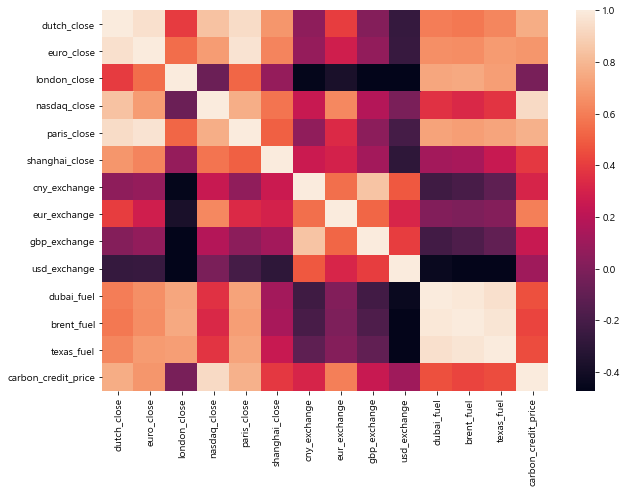

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(merge_df.corr())

### Regressor

In [24]:
x1 = merge_df.drop(['carbon_credit_price','date'],axis=1)
y1 = merge_df['carbon_credit_price']

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=100)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [28]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 15.041803946996154
r_score : 0.9529656917468655

Ridge
rmse : 15.017883076219423
r_score : 0.9531151694283095

Lasso
rmse : 16.921056365975026
r_score : 0.9404790495228441

XGBRegressor
rmse : 5.961406963484271
r_score : 0.9926122455101068

LGBMRegressor
rmse : 6.260046378014654
r_score : 0.9918535196388419

RandomForestRegressor
rmse : 5.414790273510533
r_score : 0.9939049370737497



### cross validation

In [33]:
from sklearn.model_selection import cross_val_score

models = [lr, rid, las, xgb, lgbm, rfr]

for m in models:
    scores = cross_val_score(m, x_train_scaled1, y_train1,  cv = 5)
    print('{}'.format(m))
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

LinearRegression()
평균 accuracy score : 0.9598662162265527
표준편차 :  0.0075826848642730465

Ridge()
평균 accuracy score : 0.9598295098686528
표준편차 :  0.007418196323060191

Lasso()
평균 accuracy score : 0.944775713163503
표준편차 :  0.009898213894536143

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
평균 accuracy score : 0.9927852188804863
표준편차 :  0.0014074213433740027

LGBMRegressor()
평균 accuracy score : 0.9919456733123517
표준편차 :  0.0015900368249717048

RandomForestRegressor()
평균 

## gridsearch

In [63]:
params = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
models1 = [rid, las, xgb, lgbm]

In [64]:
from sklearn.model_selection import GridSearchCV


In [66]:
for m in models1:
    grid = GridSearchCV(m, param_grid = params )
    grid.fit(x_train_scaled1, y_train1)
    print(m.__class__.__name__)
    print(grid.best_params_)
    print(grid.best_score_)
    print()

Ridge()
{'alpha': 0.1}
0.9598714124024331

Lasso()
{'alpha': 0.001}
0.9598659047797004

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'alpha': 0.001}
0.9927852188804863

LGBMRegressor()
{'alpha': 0.001}
0.9919456733123517



## classification

In [125]:
merge_df2 = merge_df.copy()
merge_df2.head(5)

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05,254.77
1,2021-10-29,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57,262.68
2,2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06
3,2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
4,2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61


In [126]:
merge_df2['dutch_close'] = (merge_df2['dutch_close'].shift()-merge_df2['dutch_close'])/merge_df2['dutch_close']
merge_df2['euro_close'] = (merge_df2['euro_close'].shift()-merge_df2['euro_close'])/merge_df2['euro_close']
merge_df2['london_close'] = (merge_df2['london_close'].shift()-merge_df2['london_close'])/merge_df2['london_close']
merge_df2['nasdaq_close'] = (merge_df2['nasdaq_close'].shift()-merge_df2['nasdaq_close'])/merge_df2['nasdaq_close']
merge_df2['paris_close'] = (merge_df2['paris_close'].shift()-merge_df2['paris_close'])/merge_df2['paris_close']
merge_df2['shanghai_close'] = (merge_df2['shanghai_close'].shift()-merge_df2['shanghai_close'])/merge_df2['shanghai_close']

merge_df2['cny_exchange'] = (merge_df2['cny_exchange'].shift()-merge_df2['cny_exchange'])/merge_df2['cny_exchange']
merge_df2['eur_exchange'] = (merge_df2['eur_exchange'].shift()-merge_df2['eur_exchange'])/merge_df2['eur_exchange']
merge_df2['gbp_exchange'] = (merge_df2['gbp_exchange'].shift()-merge_df2['gbp_exchange'])/merge_df2['gbp_exchange']
merge_df2['usd_exchange'] = (merge_df2['usd_exchange'].shift()-merge_df2['usd_exchange'])/merge_df2['usd_exchange']

merge_df2['dubai_fuel'] = (merge_df2['dubai_fuel'].shift()-merge_df2['dubai_fuel'])/merge_df2['dubai_fuel']
merge_df2['brent_fuel'] = (merge_df2['brent_fuel'].shift()-merge_df2['brent_fuel'])/merge_df2['brent_fuel']
merge_df2['texas_fuel'] = (merge_df2['texas_fuel'].shift()-merge_df2['texas_fuel'])/merge_df2['texas_fuel']

merge_df2['carbon_credit_price'] = (merge_df2['carbon_credit_price'].shift()-merge_df2['carbon_credit_price'])/merge_df2['carbon_credit_price']
merge_df2['carbon_credit_price'] = merge_df2['carbon_credit_price'].apply(lambda x : 1 if x>0 else 0)

In [127]:
merge_df2 = merge_df2.dropna()

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [129]:
x2 = merge_df2.drop(['carbon_credit_price','date'],axis=1)
y2 = merge_df2['carbon_credit_price']

In [130]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,random_state=100)

In [131]:
log = LogisticRegression()
log.fit(x_train2, y_train2)

tree = DecisionTreeClassifier()
tree.fit(x_train2, y_train2)

gnb = GaussianNB()
gnb.fit(x_train2, y_train2)

rfc = RandomForestClassifier()
rfc.fit(x_train2, y_train2)

RandomForestClassifier()

In [132]:
from sklearn.metrics import accuracy_score

log_preds = log.predict(x_test2)
print('LogisticRegression')
print(accuracy_score(y_test2, log_preds))
print()

tree_preds = tree.predict(x_test2)
print('DecisionTreeClassifier')
print(accuracy_score(y_test2,tree_preds))
print()

gnb_preds = log.predict(x_test2)
print('GaussianNB')
print(accuracy_score(y_test2, gnb_preds))
print()

rfc_preds = tree.predict(x_test2)
print('RandomForestClassifier')
print(accuracy_score(y_test2,rfc_preds))
print()

LogisticRegression
0.5797546012269938

DecisionTreeClassifier
0.5122699386503068

GaussianNB
0.5797546012269938

RandomForestClassifier
0.5122699386503068



In [133]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test2, log_preds)
print(class_report)

class_report = classification_report(y_test2, tree_preds)
print(class_report)

class_report = classification_report(y_test2, gnb_preds)
print(class_report)

class_report = classification_report(y_test2, rfc_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       166
           1       0.50      0.50      0.50       160

    accuracy                           0.51       326
   macro avg       0.51      0.51      0.51       326
weighted avg       0.51      0.51      0.51       326

              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

              preci

### cross validation

In [134]:
from sklearn.model_selection import cross_val_score

models = [log, tree, gnb, rfc]

for m in models:
    scores = cross_val_score(m, x_train2, y_train2,  cv = 5)
    print('{}'.format(m))
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

LogisticRegression()
평균 accuracy score : 0.56294610151753
표준편차 :  0.008334890313570155

DecisionTreeClassifier()
평균 accuracy score : 0.5332757718472003
표준편차 :  0.012637426558294168

GaussianNB()
평균 accuracy score : 0.5598273155416013
표준편차 :  0.03876097975622213

RandomForestClassifier()
평균 accuracy score : 0.5690633176347462
표준편차 :  0.02943175796297736



In [159]:
# roc 곡선

In [153]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test2, log.predict_proba(x_test2)[:,1])

In [158]:
print(precision[:10])
print(recall[:10])
print(thresholds[:10])

[0.50632911 0.5047619  0.50636943 0.50798722 0.50961538 0.51125402
 0.51290323 0.51456311 0.51623377 0.51791531]
[1.      0.99375 0.99375 0.99375 0.99375 0.99375 0.99375 0.99375 0.99375
 0.99375]
[0.46626526 0.46996327 0.47208511 0.47862646 0.47938464 0.4817773
 0.48180697 0.48251546 0.4848127  0.4853283 ]


Text(0, 0.5, '재현율')

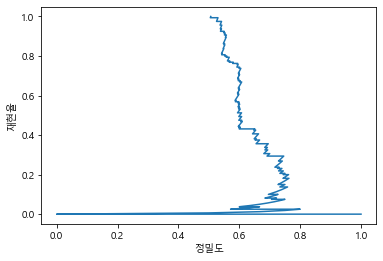

In [161]:
plt.plot(precision, recall)
plt.xlabel('정밀도')
plt.ylabel('재현율')

In [164]:
from sklearn.metrics import average_precision_score
print('logistic')
print('평균 정밀도 점수 : ' , average_precision_score(y_test2, log.predict_proba(x_test2)[:,1]))

logistic
평균 정밀도 점수 :  0.6343565731659404
